### Cataract Image Classifier

#### Install Dependencies

In [103]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [104]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [105]:
img = cv2.imread(os.path.join('dataset', 'images', '1.jpg'))

In [106]:
img

array([[[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       [[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       [[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       ...,

       [[12,  3,  0],
        [13,  4,  0],
        [14,  5,  1],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]],

       [[11,  2,  0],
        [13,  4,  0],
        [15,  6,  2],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]],

       [[11,  2,  0],
        [13,  4,  0],
        [15,  6,  2],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]]], dtype=uint8)

In [107]:
img.shape

(1728, 2592, 3)

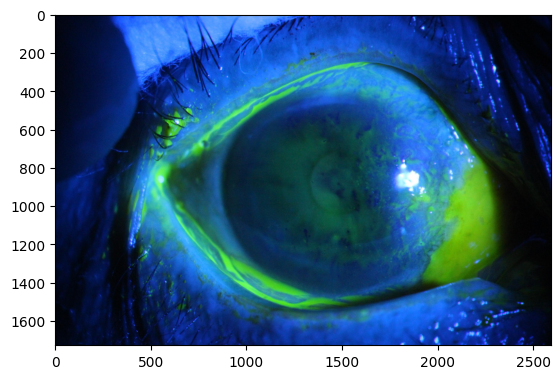

In [108]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [109]:
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 712 files belonging to 1 classes.


In [110]:
data_iterator = data.as_numpy_iterator()

In [111]:
batch = data_iterator.next()
batch

(array([[[[ 3.5078125,  9.5078125, 45.507812 ],
          [ 1.3984375,  7.3984375, 42.023438 ],
          [ 0.4375   ,  7.4375   , 33.4375   ],
          ...,
          [ 0.       ,  2.       ,  3.       ],
          [ 0.       ,  3.       ,  4.       ],
          [ 0.       ,  3.       ,  4.       ]],
 
         [[ 1.0625   ,  6.4375   , 28.0625   ],
          [ 1.2578125,  7.0625   , 29.8125   ],
          [ 1.       ,  8.       , 34.       ],
          ...,
          [ 0.1171875,  3.7421875,  4.7421875],
          [ 0.       ,  3.       ,  4.       ],
          [ 0.       ,  3.       ,  4.       ]],
 
         [[ 0.625    ,  6.625    , 18.625    ],
          [ 0.       ,  2.9453125, 23.695312 ],
          [ 2.6953125,  7.6953125, 37.695312 ],
          ...,
          [ 1.8828125,  2.       ,  4.       ],
          [ 0.8046875,  1.       ,  3.       ],
          [ 0.7265625,  1.       ,  3.       ]],
 
         ...,
 
         [[ 0.       ,  4.       ,  7.       ],
          [ 0.    

In [112]:
len(batch)

2

In [113]:
batch[0]

array([[[[ 3.5078125,  9.5078125, 45.507812 ],
         [ 1.3984375,  7.3984375, 42.023438 ],
         [ 0.4375   ,  7.4375   , 33.4375   ],
         ...,
         [ 0.       ,  2.       ,  3.       ],
         [ 0.       ,  3.       ,  4.       ],
         [ 0.       ,  3.       ,  4.       ]],

        [[ 1.0625   ,  6.4375   , 28.0625   ],
         [ 1.2578125,  7.0625   , 29.8125   ],
         [ 1.       ,  8.       , 34.       ],
         ...,
         [ 0.1171875,  3.7421875,  4.7421875],
         [ 0.       ,  3.       ,  4.       ],
         [ 0.       ,  3.       ,  4.       ]],

        [[ 0.625    ,  6.625    , 18.625    ],
         [ 0.       ,  2.9453125, 23.695312 ],
         [ 2.6953125,  7.6953125, 37.695312 ],
         ...,
         [ 1.8828125,  2.       ,  4.       ],
         [ 0.8046875,  1.       ,  3.       ],
         [ 0.7265625,  1.       ,  3.       ]],

        ...,

        [[ 0.       ,  4.       ,  7.       ],
         [ 0.       ,  4.       ,  7.       ]

In [114]:
batch[0].shape

(32, 256, 256, 3)

In [115]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

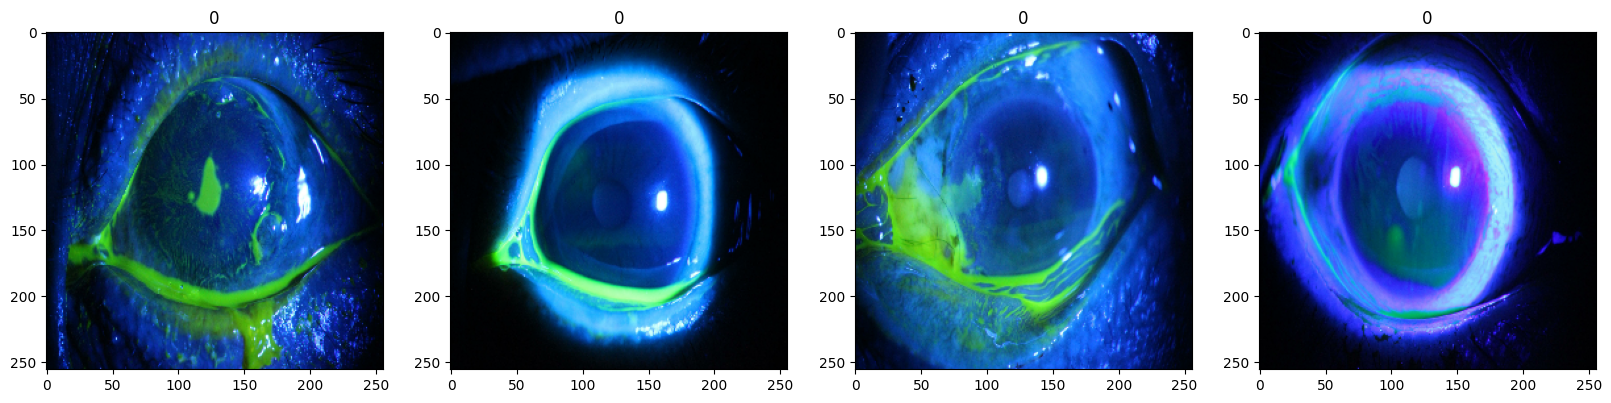

In [116]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 10))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].title.set_text(batch[1][idx])

In [117]:
scaled = batch[0] / 255.0

In [118]:
scaled.min()

0.0

In [119]:
scaled.max()

1.0

#### Pre Processing Data

Start here >

In [120]:
data = tf.keras.utils.image_dataset_from_directory('dataset', shuffle=False)

Found 712 files belonging to 1 classes.


In [121]:
data = data.shuffle(1000, seed=100, reshuffle_each_iteration=False)

In [122]:
scaled_data = data.map(lambda x, y: (x / 255.0, y))

In [123]:
scaled_iterator = scaled_data.as_numpy_iterator().next()
scaled_iterator

(array([[[[0.03115809, 0.05076593, 0.02723652],
          [0.05523897, 0.08268995, 0.01994485],
          [0.09705883, 0.14010416, 0.01715686],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.0385723 , 0.06210171, 0.02288603],
          [0.07328431, 0.10958946, 0.02052696],
          [0.09895834, 0.18308823, 0.        ],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.06446078, 0.07622549, 0.03651961],
          [0.0875    , 0.14212623, 0.00759804],
          [0.13158701, 0.24650735, 0.        ],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         ...,
 
         [[0.00695466, 0.0479473 , 0.03333334],
          [0.00931

In [124]:
scaled_iterator[0].min()

0.0

In [125]:
scaled_iterator[0].max()

1.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


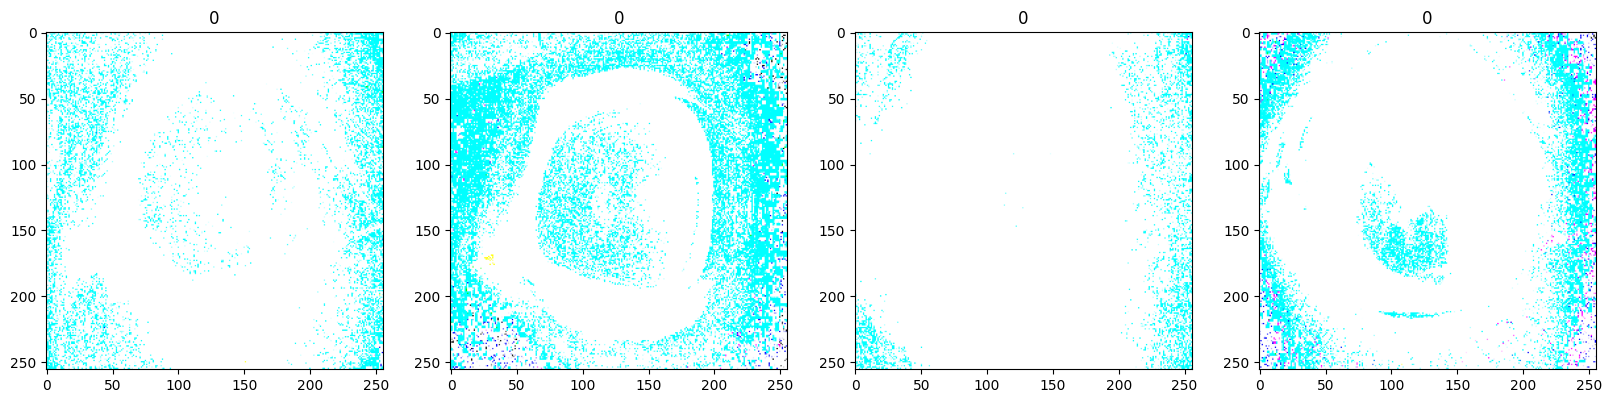

In [126]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [127]:
# length of data
len(data) 

# 23 * 32 = 736

23

#### Split Data

In [128]:
train_size = int(0.7 * len(data))       # 16 * 32 = 512
val_size = int(0.2 * len(data))         # 4 * 32 = 128
test_size = int(0.1 * len(data)) + 1    # 3 * 32 = 96

In [129]:
train_size, val_size, test_size

(16, 4, 3)

In [130]:
train_size + val_size + test_size

23

In [131]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [132]:
len(train), len(val), len(test)

(16, 4, 3)

#### Deep Learning Model

##### Building Model

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [134]:
model = Sequential()

In [135]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [136]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [137]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

##### Training Model

In [138]:
logdir = 'logs'

In [139]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [140]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 14s 599ms/step - loss: 0.0899 - accuracy: 0.9863 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
16/16 [==============================] - 15s 669ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
16/16 [==============================] - 14s 599ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
16/16 [==============================] - 15s 670ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
16/16 [==============================] - 17s 742ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
16/16 [==============================] - 16s 730ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 17s 738ms/step - loss: 0.0000e+00 - accuracy: 

In [141]:
hist.history

{'loss': [0.08992641419172287,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'accuracy': [0.986328125,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

#### Plotting Performance

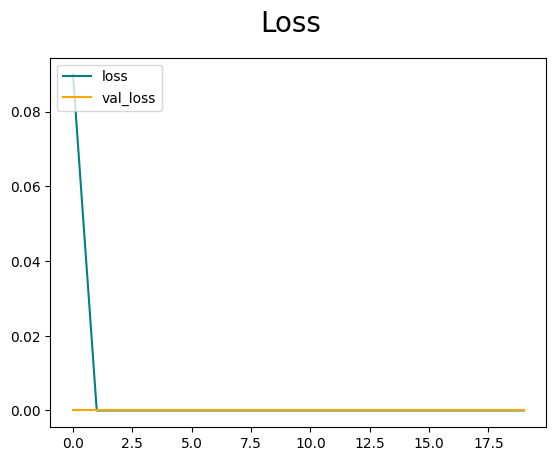

In [142]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

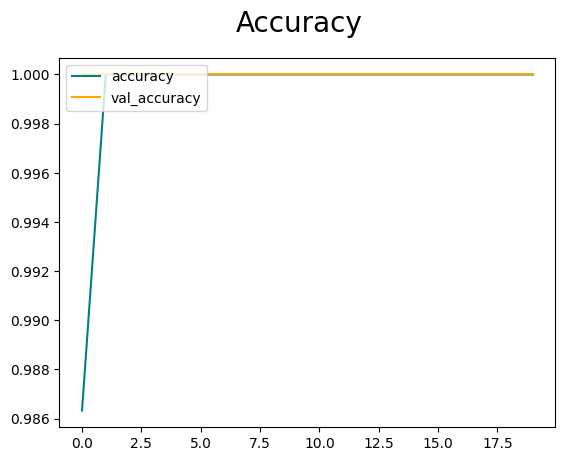

In [143]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

#### Evaluating Performance

##### Evaluating Model

In [144]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [145]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [146]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 132ms/step


In [147]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.0, Recall: 0.0, Accuracy: 1.0
